# Exercise: Exploratory Data Analysis with Pandas
## Instructions
1. Data Collection
    - Search and collect data on the following: (1993 - 2023)
        - Israel interest tares
        - US interest rates
        - USD to ILS exchange rates
    - For each dataset, create a pandas DataFrame with the following columns:
        - Year
        - Month
        - Current_Rate (Interest rate or exchange rate for that month)
        - Change_From_Last_Month (Difference in Current_Rate from the previous month)
        - Optional: You may include additional columns if you find them useful (e.g., Change_Percentage, Date).



In [193]:
import pandas as pd
BR = pd.read_csv('BR.csv', header=0, sep=',')
BR['TIME_PERIOD'] = pd.to_datetime(BR['TIME_PERIOD'], errors='coerce')
BR_first_of_month = BR[BR['TIME_PERIOD'].dt.day == 1]
BR_first_of_month['month']  = BR['TIME_PERIOD'].dt.month
BR_first_of_month['year']  = BR['TIME_PERIOD'].dt.year
BR_first_of_month['Change_From_Last_Month'] = BR_first_of_month['OBS_VALUE'] - BR_first_of_month['OBS_VALUE'].shift(1)
BR_first_of_month = BR_first_of_month[['year', 'month', 'OBS_VALUE', 'Change_From_Last_Month']]



DS = pd.read_csv('DS.csv', header=0, sep=',')
DS['Date'] = pd.to_datetime(DS['Date'], errors='coerce')
DS_first_of_month = DS[DS['Date'].dt.day == 1]
DS_first_of_month['month'] = DS_first_of_month['Date'].dt.month
DS_first_of_month['year'] = DS_first_of_month['Date'].dt.year
DS_first_of_month['Change_From_Last_Month'] = DS_first_of_month['USD'] - DS_first_of_month['USD'].shift(1)
DS_first_of_month = DS_first_of_month[['year', 'month', 'USD', 'Change_From_Last_Month']]



USA_BR = pd.read_csv('USA_BR.csv', header=0, sep=',')
USA_BR['Date'] = pd.to_datetime(USA_BR['Date'], errors='coerce')
USA_BR_first_of_month = USA_BR[USA_BR['Date'].dt.day == 1]
USA_BR_first_of_month['month'] = USA_BR_first_of_month['Date'].dt.month
USA_BR_first_of_month['year'] = USA_BR_first_of_month['Date'].dt.year
USA_BR_first_of_month['Change_From_Last_Month'] = USA_BR_first_of_month['Interest'] - USA_BR_first_of_month['Interest'].shift(1)
USA_BR_first_of_month = USA_BR_first_of_month[['year', 'month', 'Interest', 'Change_From_Last_Month']]

# BR_first_of_month.head()
# DS_first_of_month.head()
# USA_BR_first_of_month.head()






<ipython-input-193-cffa133331e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BR_first_of_month['month']  = BR['TIME_PERIOD'].dt.month
<ipython-input-193-cffa133331e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BR_first_of_month['year']  = BR['TIME_PERIOD'].dt.year
<ipython-input-193-cffa133331e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

## Part A: Single DataFrame Analysis
1. Display the first 5 rows of the US interest rates DataFrame.

2. Calculate the average Israeli interest rate over the period covered by your data.

3. Find the month and year when the USD to ILS exchange rate had the highest increase from the previous month.

4. Determine the total number of months where the US interest rate decreased compared to the previous month.

5. Add a new column to the Israeli interest rates DataFrame called Change_Percentage, representing the percentage change from the previous month.



In [177]:
# A - 1
USA_BR_first_of_month.head(5)

,year,month,Interest,Change_From_Last_Month
0,1954,7,1.13,NaN
31,1954,8,0.25,-0.88
62,1954,9,1.44,1.19
92,1954,10,0.50,-0.94
123,1954,11,1.38,0.88


In [66]:
# A - 2
BR_first_of_month['OBS_VALUE'].mean()

4.868513513513514

In [67]:
# A - 3
DS_first_of_month['USD'].max()

4.823

In [178]:
# A - 4
USA_BR_first_of_month['Change_From_Last_Month'].loc[USA_BR_first_of_month['Change_From_Last_Month'] <= 0].count()

454

In [194]:
# A - 5
BR_first_of_month['Change_Percent'] = (BR_first_of_month['Change_From_Last_Month'] / BR_first_of_month['OBS_VALUE'].shift(1)) * 100

BR_first_of_month.head(30)

,year,month,OBS_VALUE,Change_From_Last_Month,Change_Percent
5,1994,2,10.5,NaN,NaN
33,1994,3,10.5,0.0,0.000000
64,1994,4,10.5,0.0,0.000000
94,1994,5,10.5,0.0,0.000000
125,1994,6,11.5,1.0,9.523810
155,1994,7,12.0,0.5,4.347826
186,1994,8,12.5,0.5,4.166667
217,1994,9,14.0,1.5,12.000000
247,1994,10,15.5,1.5,10.714286
278,1994,11,15.5,0.0,0.000000


## Part B: Merging DataFrames
1. Merge the US and Israeli interest rates DataFrames on Year and Month.

2. In the merged DataFrame, create a new column Rate_Difference that shows the difference between the Israeli and US interest rates for each month.

3. Identify all months when the Israeli interest rate was at least 1% higher than the US interest rate - IH (Israeli Higher).
Identify all months when the US interest rate was at least 1% higher than the Israeli interest rate - UH (US Higher).
Identify all months when the interest rates were within 1% of each other - N (Near)
make a new column called Rate_Comparison with the following values: IH, UH, or N.

4. Merge the exchange rate DataFrame with the merged interest rates DataFrame.

5. After merging all three DataFrames, find the correlation between the Rate_Difference and the Current_Rate of the exchange rate.
hint: find the connection between the difference in interest rates and the exchange rates, use any method you think is appropriate.
provide an explanation of the results (in Hebrew) - at least 2 rows of text + a proof of the connection(some output) you found.


In [195]:
# B - 1
US_IL_merge = pd.merge(left=BR_first_of_month, right=USA_BR_first_of_month, left_on=['month', 'year'], right_on=['month', 'year']).reset_index()
US_IL_merge.head()

,index,year,month,OBS_VALUE,Change_From_Last_Month_x,Change_Percent,Interest,Change_From_Last_Month_y
0,0,1994,2,10.5,NaN,NaN,3.25,0.40
1,1,1994,3,10.5,0.0,0.00000,3.31,0.06
2,2,1994,4,10.5,0.0,0.00000,3.64,0.33
3,3,1994,5,10.5,0.0,0.00000,3.73,0.09
4,4,1994,6,11.5,1.0,9.52381,4.33,0.60


In [196]:
# B - 2
US_IL_merge['Rate_Difference'] = abs(US_IL_merge['OBS_VALUE'] - US_IL_merge['Interest'])
US_IL_merge.dtypes

,0
index,int64
year,int32
month,int32
OBS_VALUE,float64
Change_From_Last_Month_x,float64
Change_Percent,float64
Interest,float64
Change_From_Last_Month_y,float64
Rate_Difference,float64


In [197]:
# B - 3
US_IL_merge['Rate_Difference'] = None  # אתחול העמודה

for index, row in US_IL_merge.iterrows():
    IL = row['OBS_VALUE']
    US = row['Interest']
    if IL > US:
        if (IL / US) * 100 > 1:
            US_IL_merge.at[index, 'Rate_Difference'] = 'IH'
        else:
            US_IL_merge.at[index, 'Rate_Difference'] = 'N'
    elif (US / IL) * 100 > 1:
        US_IL_merge.at[index, 'Rate_Difference'] = 'UH'
    else:
        US_IL_merge.at[index, 'Rate_Difference'] = 'N'

US_IL_merge.tail(20)

,index,year,month,OBS_VALUE,Change_From_Last_Month_x,Change_Percent,Interest,Change_From_Last_Month_y,Rate_Difference
324,324,2022,8,1.25,0.50,66.666667,2.33,0.75,UH
325,325,2022,9,2.00,0.75,60.000000,2.33,0.00,UH
326,326,2022,11,2.75,0.75,37.500000,3.08,0.75,UH
327,327,2022,12,3.25,0.50,18.181818,3.83,0.75,UH
328,328,2023,2,3.75,0.50,15.384615,4.33,0.50,UH
329,329,2023,3,4.25,0.50,13.333333,4.58,0.25,UH
330,330,2023,5,4.50,0.25,5.882353,4.83,0.25,UH
331,331,2023,6,4.75,0.25,5.555556,5.08,0.25,UH
332,332,2023,8,4.75,0.00,0.000000,5.33,0.25,UH
333,333,2023,9,4.75,0.00,0.000000,5.33,0.00,UH


In [198]:
# B - 4
US_IL_merge = pd.merge(left=US_IL_merge, right=DS_first_of_month, left_on=['month', 'year'], right_on=['month', 'year']).reset_index()
US_IL_merge.head(100)

,level_0,index,year,month,OBS_VALUE,Change_From_Last_Month_x,Change_Percent,Interest,Change_From_Last_Month_y,Rate_Difference,USD,Change_From_Last_Month
0,0,1,1994,3,10.50,0.00,0.000000,3.31,0.06,IH,2.986,-0.009
1,1,2,1994,4,10.50,0.00,0.000000,3.64,0.33,IH,2.995,0.008
2,2,3,1994,5,10.50,0.00,0.000000,3.73,0.09,IH,2.987,0.000
3,3,4,1994,6,11.50,1.00,9.523810,4.33,0.60,IH,2.987,0.000
4,4,5,1994,7,12.00,0.50,4.347826,3.82,-0.51,IH,2.987,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,140,2005,10,3.75,0.25,7.142857,3.93,0.36,UH,4.371,0.011
96,96,141,2005,11,4.00,0.25,6.666667,3.99,0.06,IH,4.360,-0.005
97,97,142,2005,12,4.50,0.50,12.500000,4.03,0.04,IH,4.365,-0.230
98,98,145,2006,3,4.75,0.00,0.000000,4.52,0.05,IH,4.595,0.018


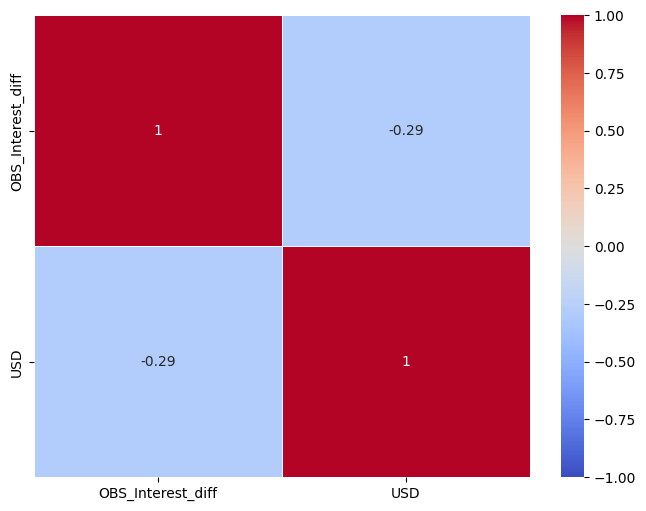

In [202]:
# B - 5
# import seaborn as sns
# import matplotlib.pyplot as plt


# plt.figure(figsize=(10, 6))
# plt.scatter((US_IL_merge['OBS_VALUE'] - US_IL_merge['Interest']), US_IL_merge['USD'])

# plt.show()



import seaborn as sns
import matplotlib.pyplot as plt


US_IL_merge['OBS_Interest_diff'] = US_IL_merge['OBS_VALUE'] - US_IL_merge['Interest']


correlation_matrix = US_IL_merge[['OBS_Interest_diff', 'USD']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)



plt.show()


## Part C: Analyzing Relationships Between DataFrames
1. Analyze whether increases in US interest rates are associated with increases or decreases in the USD to ILS exchange rate in the same month.

2. Determine if changes in the Israeli interest rate have a stronger impact on the exchange rate than changes in the US interest rate.

3. Find any time lags in the effect of interest rate changes on the exchange rate. For example, does a change in US interest rates affect the exchange rate in the following month?
(כלומר- האם כשיש שינוי בריבית כלשהי - האם מייד יש שינוי בשער ההמרה? או שיש דיליי של חודש/חודשים עד שמרגישים את ההשפעה - אם בכלל?)

4. Calculate the rolling past 3-month average of the exchange rate for each data time, and add it as a new column.

5. Identify any periods where both US and Israeli interest rates were decreasing, and analyze how the exchange rate behaved during those periods.



In [ ]:
# Bonus

# Bonus
choose 3 global / local events or periods that you think could have affected the exchange rate or interest rates
and analyze the effect of these events on the data you collected.
show proof of your analysis that supports your claim.

(כלומר- תבחנו אירועים שקרו בתקופה שאתם עובדים עליה ובדקו איך הם השפיעו על הנתונים שאתם עובדים איתם)
למשל: בחירות בארה״ב, בחירות בישראל, רוסיה אוקראינה, מלחמות בישראל וכו׳.

In [ ]:
# Your code here